In [26]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


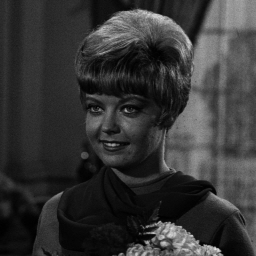

In [27]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/girl.jpg')
print(img.shape)
gimg1=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [28]:
outimg= np.zeros(gimg1.shape, dtype=np.uint8)

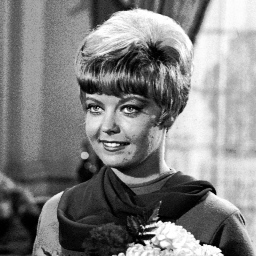

In [29]:
outimh=cv2.equalizeHist(gimg1)
cv2_imshow(outimh)

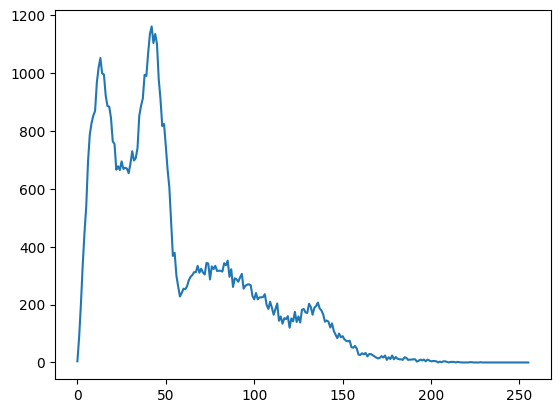

In [30]:
hist= cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

In [ ]:
myhist = np.zeros((256),dtype=np.int32)

KeyboardInterrupt: 

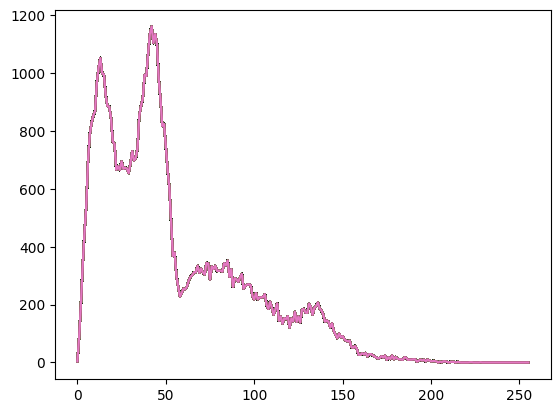

In [25]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    myhist[gimg1[h,w]] + 1

    plt.plot(myhist)

In [31]:
cumalhist = np.zeros((256),dtype=np.int32)

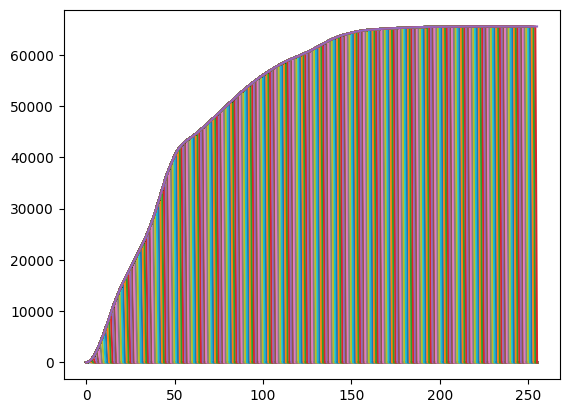

In [33]:
cumalhist[0] = myhist[0]
for i in range(1,256):
  cumalhist[i] = cumalhist[i-1] + myhist[i]
  plt.plot(cumalhist)

히스토그램 평활화

In [34]:
equalhist = np.zeros((256),dtype=np.int32)

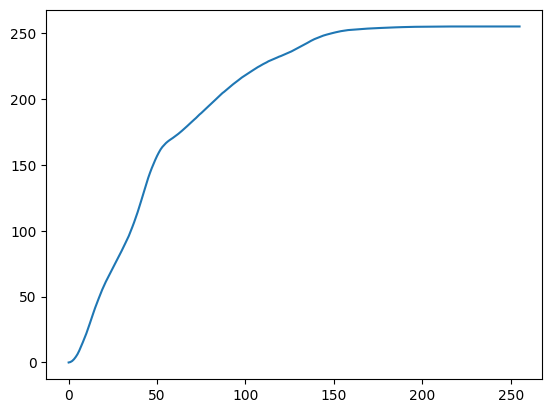

In [38]:
numOfPixel=gimg1.shape[0]* gimg1.shape[1]
equalhist = (cumalhist / numOfPixel) * 255

plt.plot(equalhist)

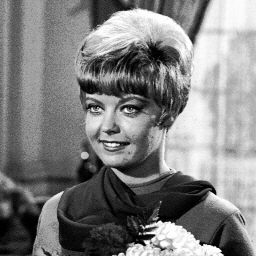

In [42]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    outimg[h,w] = equalhist[gimg1[h,w]]
cv2_imshow(outimg)